# Improving our Convnet with Pretrained Models

---
## Introduction 
In the previous post, we trained a convnet from scratch to classify photos as either "food" or "notfood". We used the [Food-5K](https://mmspg.epfl.ch/food-image-datasets) dataset, and we were able to achieve 84.3% test accuracy. In the process, we learned how to work with a real world dataset and use data augmentation to reduce overfitting in our bias. 

Today, we are going to try to improve our Food vs. Not Food classifier by using pretrained networks. Pretained networks are models that have been previously trained on large, general image datasets. As a result, they provide more powerful feature extractors than we can learn on our own with our small dataset. Keras provides a number of pretrained models so we can easily incorporate them into our work. 

We will begin by looking at some of the models provided by Keras, and then we will use one to improve our classifier. 

---
## Pretrained Convnets in Keras

### Models Available
The following pretrained convnets are made available by Keras
+ [Xception](https://keras.io/applications/#xception)
+ [VGG16](https://keras.io/applications/#vgg16)
+ [VGG19](https://keras.io/applications/#vgg19)
+ [ResNet50](https://keras.io/applications/#resnet50)
+ [InceptionV3](https://keras.io/applications/#inceptionv3)
+ [InceptionResNetV2](https://keras.io/applications/#inceptionresnetv2)
+ [MobileNet](https://keras.io/applications/#mobilenet)
+ [DenseNet](https://keras.io/applications/#densenet)
+ [NASNet](https://keras.io/applications/#nasnet)
+ [MobileNetV2](https://keras.io/applications/#mobilenetv2)

### How Were They Trained?
These networks were mostly trained on ImageNet, which is summarized by [Wikipedia](https://en.wikipedia.org/wiki/ImageNe) as follows

> The ImageNet project is a large visual database designed for use in visual object recognition software research. Over 14 million URLs of images have been hand-annotated by ImageNet to indicate what objects are pictured; in at least one million of the images, bounding boxes are also provided. ImageNet contains over 20 thousand categories; a typical category, such as "balloon" or "strawberry", contains several hundred images.

Many models have been trained on ImageNet due to the annual [ImageNet challenge](http://image-net.org/challenges/LSVRC/)

> The ImageNet Large Scale Visual Recognition Challenge (ILSVRC) evaluates algorithms for object detection and image classification at large scale. One high level motivation is to allow researchers to compare progress in detection across a wider variety of objects -- taking advantage of the quite expensive labeling effort. Another motivation is to measure the progress of computer vision for large scale image indexing for retrieval and annotation.

In the challenge, the ImageNet dataset is trimmed to objects within 1000 categories. 

### Comparison of Available Models
The Keras documentation provides the following summary of the models listed above

|Model	            |Size	 |Top-1 Accuracy	|Top-5 Accuracy	|Parameters	 |Depth |
|:------------------|:-------|:----------------:|:-------------:|:----------:|:----:|
|Xception	        |88 MB	 |0.790	            |0.945	        |22,910,480	 |126   |
|VGG16	            |528 MB	 |0.713	            |0.901	        |138,357,544 |23    |
|VGG19	            |549 MB	 |0.713	            |0.900	        |143,667,240 |26    |
|ResNet50	        |99 MB	 |0.749	            |0.921	        |25,636,712	 |168   |
|InceptionV3	    |92 MB	 |0.779	            |0.937	        |23,851,784	 |159   |
|InceptionResNetV2	|215 MB	 |0.803	            |0.953	        |55,873,736	 |572   |
|MobileNet	        |16 MB	 |0.704	            |0.895	        |4,253,864	 |88    |
|MobileNetV2	    |14 MB	 |0.713	            |0.901	        |3,538,984	 |88    |
|DenseNet121	    |33 MB	 |0.750	            |0.923	        |8,062,504	 |121   |
|DenseNet169	    |57 MB	 |0.762	            |0.932	        |14,307,880	 |169   |
|DenseNet201	    |80 MB	 |0.773	            |0.936	        |20,242,984	 |201   |
|NASNetMobile	    |23 MB	 |0.744	            |0.919	        |5,326,716	 |-     |
|NASNetLarge	    |343 MB	 |0.825	            |0.960	        |88,949,818	 |-     |

The Top-1 accuracy measures what percentage of images these got exactly right. The Top-5 accuracy considers an object correctly classified it its true class is withing the top five predicted class. For instance, if a model outputs go-kart, jeep, convertible, minivan, and cab as its top 5 predictions, and the object is really a convertible, then that is considered a correct classification.

### Brief Summary of Models
The [Deep Learning Specialization](https://www.coursera.org/learn/convolutional-neural-networks/home/welcome) covers VGG16, ResNet50, and InceptionV3 which I will quickly summarize below. 

#### VGG16
As you may have noticed, neural networks have many hyperparameters: how many layers should there be, how many nodes should each layer have, etc. VGG-16 is a large neural network which tried to simplify this. Every convolution layer uses 3x3 filters with same padding, and all pooling layers are max-pool layers with 2x2 filters and strides (meaning they halve the input size). The number of filters in each convolution layer follows a "powers of 2" pattern: 64, 128, 256, 512, 512. There are two fully connected layers containing 4096 nodes each, and a final softmax layer with 1000 notes. As you can see, it is a fairly massive network with 138,357,544 weights. The "16" in "VGG16" refers to the fact that there are 16 layers with trainable weights. 

Here is the paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

#### ResNet50 
Very deep neural networks are difficult to train because of vanishing/exploding gradients. ResNets try to solve this problem by using "Residual Blocks". In a residual block, the input to layer $l$ will also be fed directly into layer $l+1$. This makes it easy for layer $l$ to learn an identity function – which means that even if layer $l$ isn't helping the network, it at least won't be hurting the network. As a result, ResNets can be very deep networks enabling them to learn very high-level features. 

Here is the paper: [Deep Residual Learning for Visual Recognition](https://arxiv.org/abs/1512.03385)

#### InceptionV3
Whereas VGG16 tried to simplify convnets by saying, "Let's just always use 3x3 filters," Inception networks try to simplify convnets by saying, "Let's just use every sized filter, for every layer, and let the network decide what works best." By using same padding with each convolution operation, an inception block can use 1x1, 3x3, 5x5, etc. filters in every layer of the network. There are some tricks to implementing this that reduce the number of computations by about a factor of 10, so I would recommend checking out the Coursera lecture on Inception nets or the original paper to understand the implementation. Of the three networks discussed, InceptionV3 has the best Top-1 and Top-5 accuracy, so we'll use it as our base model. 

Original Inception paper: [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)

InceptionV3 paper: [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/abs/1512.00567)

---
## Using Pretrained Models 
VGG16, ResNet50, and InceptionV3 have been trained on very large datasets – far larger than our 2,500 food pictures. Because they have been trained on such a large dataset, they should have learned very general features about images. The idea behind using pretrained models is that we can use the pretrained convolutional layers to extract features from our image, then we can train our own densely connected layers to generate predictions. We are going to use InceptionV3 as our feature extractor and train a densely connected network using its outputs. 

The code below imports the InceptionV3 model (be patient while it downloads ⌚️👀). The parameters are pretty important to understand. `include_top=False` means we don't want to load the densely connected layers that were trained for predicting ImageNet. Instead, we just want to use the convolutional base to extract features, and we wil train our own classifier for classifying between food and non-food images. `weights='imagenet` means we want to use the pretrained weights from ImageNet. If you exclude this paramater the weights will be randomly initialized which won't be very helpful for extracting features. Finally, we specify the input shape we want to use.

In [26]:
from keras.applications import InceptionV3

# Use only the convolutional layers pretrained on ImageNet
conv_base = InceptionV3(include_top=False, 
                        weights='imagenet', 
                        input_shape=(150, 150, 3))

In order to feed the outputs of InceptionV3 into our own classifier we need to know their dimensions and reshape them into a 1D tensor. This is simple to do in Keras.

In [25]:
print('Output Dimension', conv_base.output_shape)

Output Dimension (None, 3, 3, 2048)


--- 
## Preparing our Data
We could train our model by feeding every image through InceptionV3 during each epoch of training. This would be incredibly expensive though. After all, we only need the output of InceptionV3, and that never changes since we aren't training the convolutional base. Instead, we will pre-process our data by feeding it through InceptionV3, storing the outputs, and using that to train our densely connected layers. 

In [11]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define directories 
base_dir = '/Users/jtbergman/Datasets/Food-5K'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Define Image Data Generator 
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20 

# Feature Extraction 
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
    i = 0
    for x_batch, y_batch in generator:
        features_batch = conv_base.predict(x_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = y_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 3000) 
validation_features, validation_labels = extract_features(val_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


We need to shape our data into 1D tensors for our densely connected network. 

In [13]:
train_features = np.reshape(train_features, (3000, 3 * 3 * 2048))
validation_features = np.reshape(validation_features, (1000, 3 * 3 * 2048))
test_features = np.reshape(test_features, (1000, 3 * 3 * 2048))

---
## Training our Model
Because the InceptionV3 convolutional base is such a powerful feature extractor, we will be able to learn very quickly. Because of this, we will use a dense layer with 256 nodes and a sigmoid output. We will use a dropout layer with a 50% dropout rate. Furthermore, we `import optimizers` so we can set a learning rate of 0.00002 for RMSprop. Despite the high drop rate and low learning rate, our model will learn incredibly fast. You should achieve ~90% accuracy after one epoch, 95% accuracy within three epochs, and 99+% accuracy within 10 epochs.

In [16]:
from keras import models 
from keras import layers 
from keras import optimizers

model = models.Sequential() 
model.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

Note: Since we've already passed the data through InceptionV3, this should run in under 2 minutes.

In [17]:
history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=20,
                    verbose=1,
                    validation_data=(validation_features, validation_labels))

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2737 - acc: 0.9030 - val_loss: 0.0919 - val_acc: 0.9750
Epoch 2/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1100 - acc: 0.9663 - val_loss: 0.1064 - val_acc: 0.9690
Epoch 3/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0787 - acc: 0.9740 - val_loss: 0.0865 - val_acc: 0.9750
Epoch 4/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0608 - acc: 0.9803 - val_loss: 0.0997 - val_acc: 0.9680
Epoch 5/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0460 - acc: 0.9847 - val_loss: 0.0896 - val_acc: 0.9740
Epoch 6/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0373 - acc: 0.9870 - val_loss: 0.0962 - val_acc: 0.9760
Epoch 7/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0202 - acc: 0.9940 - val_loss: 0.1024 - val_acc: 0.9730
Epoch 8

As always, let's plot our training and validation accuracy and loss. 

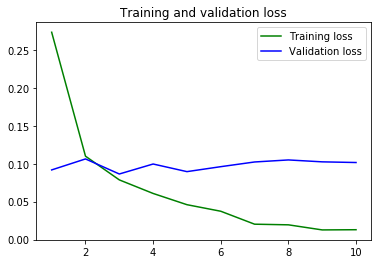

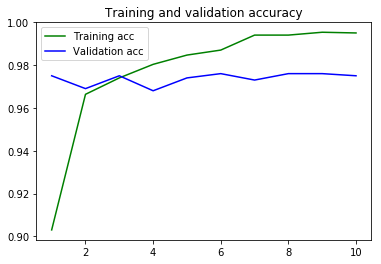

In [20]:
import matplotlib.pyplot as plt

# Accuracy 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs
epochs = range(1, len(acc) + 1)

# Loss and Accuracy
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

Despite the high drop rate, there's still considerable overfitting. Nevertheless, we are performing significantly better than our 84.3% accuracy from the previous post. In fact, our test accuracy has increased by ~13%!

In [22]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('Test Accuracy', test_acc)

1000/1000 [==============================] - 0s 439us/step
Test Accuracy 0.973


---
## Training a Final Model
We will combine our training and validation datasets into a slightly larger dataset and train our final model.

In [28]:
# Combine into one dataset
all_train_features = np.concatenate((train_features, validation_features))
all_train_labels = np.concatenate((train_labels, validation_labels))

# Check shape 
print(all_train_features.shape)
print(all_train_labels.shape)

(4000, 18432)
(4000,)


We'll define the same architecture as before and train it for the same number of epochs.

In [30]:
from keras import models 
from keras import layers 
from keras import optimizers

# Same architecture
food = models.Sequential() 
food.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 2048))
food.add(layers.Dropout(0.5))
food.add(layers.Dense(1, activation='sigmoid'))

# Same compilation
food.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

# New training set
history = food.fit(all_train_features, all_train_labels,
                    epochs=10,
                    batch_size=20,
                    verbose=1)

Epoch 1/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.2532 - acc: 0.9185: 9s - loss: - ETA: 7s - loss: 0.30 - ETA: 2s 
Epoch 2/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.1086 - acc: 0.9642
Epoch 3/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0806 - acc: 0.9720: 6s - loss: 0
Epoch 4/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0474 - acc: 0.9830: 0s - loss: 0.0470 - acc: - ETA: 0s - loss: 0.0477 - acc: 0.98
Epoch 5/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0376 - acc: 0.9850: 4s - loss:
Epoch 6/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.0316 - acc: 0.9895
Epoch 7/10
4000/4000 [==============================] - 15s 4ms/step - loss: 0.0241 - acc: 0.9912
Epoch 8/10
4000/4000 [==============================] - 14s 4ms/step - loss: 0.0187 - acc: 0.9932
Epoch 9/10
4000/4000 [==============================] - ETA: 0s - loss: 0.0141 - 

Let's evaluate our model on our test set and see how frequently we're accidentally going to eat not food.

In [44]:
test_loss, test_acc = food.evaluate(test_features, test_labels)
print('Test Accuracy', test_acc)

1000/1000 [==============================] - 2s 2ms/step
Test Accuracy 0.973


We end up getting the same accuracy as before, but hey, 97.3% is pretty good! You can try training for more epochs and seeing if it improves the accuracy.

---
## A Final Note
In order to make predictions with our model, any inputs have to be fed through the convolutional base first – we can't just feed them directly to our model, that's not what it learned to make predictions on. For instance, we would do something like 
```python 
data = ...
processed_data = conv_base.predict(data)
processed_data = processed_data.reshape(...)
predictions = food.predict(processed_data)
```

It may be cleaner to combine the convolutional base and our top layers in a single layer so we can do. This would also make it easier to save the model in case Keras changes the InceptionV3 weight initialization. 
```python 
data = ... 
predictions = final.predict(data)
```

Fortunately, Keras makes it easier to combine models by treating them like layers. We simply add the convolutional base first, then a flattening layer (since we can't np.reshape()), then add our dense classifier on top. 

In [39]:
# Create a single final model
final = models.Sequential()

# Conv Base + Flatten + Our Classifier 
final.add(conv_base)
final.add(layers.Flatten())
final.add(food)

# Compile the model
final.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

To show that this gives the same results, let's feed the test data through again. 

In [43]:
# Create a datagenerator for data that has not been preprocessed by InceptionV3
test_generator = datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150),
    class_mode='binary',
    batch_size=20)

# Display the accuracy 
loss, acc = final.evaluate_generator(test_generator, steps=50, use_multiprocessing=False)
print('Accuracy:', acc)

Found 1000 images belonging to 2 classes.
Accuracy: 0.9729999947547913


Feel free to save this model. GitHub will complain if I try to push a 100mb model, so I am actually just going to save the layers we trained. Feel free to replace `food` with `final` if you want to save the entire thing.

In [45]:
food.save('food_vs_notfood_v3.h5')

---
## Summary
Despite having a small training set (3,000 images) we were able to get 97.3% accuracy on our test set! We did this by using a pretrained model to perform feature extraction. Here are the key takeaways.

### Using Pretrained Models
Use pretrained models with `include_top=False` to build your own models on top of them.
```python
from keras.applications import InceptionV3

# Use only the convolutional layers pretrained on ImageNet
conv_base = InceptionV3(include_top=False, 
                        weights='imagenet', 
                        input_shape=(150, 150, 3))
```

### Combining Models
Models can be combined as simply as layers in Keras. Combine your base and dense classifiers.
```python 
# Create a single final model
final = models.Sequential()

# Conv Base + Flatten + Our Classifier 
final.add(conv_base)
final.add(layers.Flatten())
final.add(food)
```

### References 
+ [VGG16]